# 일반 모델의 변수 중요도
* Permutation Feature Importance


## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import *

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

### 2) 데이터 로딩

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* 변수 설명
    * crim : 범죄율
    * zn : 대저택 비율
    * indus : 산업단지 비율
    * chas : 찰스 강변 여부
    * nox : 일산화질소 농도(공기오염도)
    * rm : 평균 주택당 방 수
    * age : 30년 이상된 주택 비율
    * dis : 주요 업무 지역 접근성 지수
    * rad : 고속도로 접근성 지수
    * tax  1만 달러당 재산세
    * ptratio : 교사 1명당 학생수
    * lstat : 하위계층 비율
    * black : 흑인비율(원래 숫자를 변형한 것임)
    * mdev : 타운별 집값 중위수(단위 : 1000달러)

### 3) 필요한 함수 생성

In [3]:
# 변수 중요도 plot1
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

In [4]:
# 변수 중요도 plot2
def plot_PFI(pfi, col_names):
    plt.figure(figsize = (14,5))
    plt.subplot(1,2,1)
    for i,vars in enumerate(col_names) :
        sns.kdeplot(pfi.importances[i], label = vars)
    plt.legend()
    plt.grid()

    sorted_idx = pfi.importances_mean.argsort()
    plt.subplot(1,2,2)
    plt.boxplot(pfi.importances[sorted_idx].T, vert=False, labels=col_names[sorted_idx])
    plt.axvline(0, color = 'r')
    plt.grid()
    plt.show()

## 2.데이터 준비


### 1) x, y로 나누기

In [5]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

### 3) train : validation 분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 2022)
x_train.shape

(404, 12)

### 4) 스케일링

In [7]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.Permutation Feature Importance

* model1 : SVM
* model2 : DL

In [8]:
from sklearn.inspection import permutation_importance

### 1) SVM 모델

In [9]:
model1 = SVR()
model1.fit(x_train_s, y_train)

SVR()

* permutation feature importance 구하기

In [10]:
pfi1 = permutation_importance(model1, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

In [11]:
pfi1

{'importances_mean': array([0.01124064, 0.02393944, 0.04219761, 0.04474468, 0.0347364 ,
        0.14629916, 0.06519505, 0.0253019 , 0.03960922, 0.07816104,
        0.07821846, 0.24740766]),
 'importances_std': array([0.00305263, 0.00909158, 0.00803779, 0.01681181, 0.01124771,
        0.01556842, 0.02008155, 0.01634439, 0.0135496 , 0.0213462 ,
        0.01522869, 0.02799449]),
 'importances': array([[0.01407583, 0.01370718, 0.01074491, 0.01610413, 0.00929864,
         0.00701685, 0.01497169, 0.0084053 , 0.00806235, 0.01001949],
        [0.01666241, 0.02779629, 0.03625315, 0.02057153, 0.03777106,
         0.01501232, 0.02596703, 0.00663567, 0.02418448, 0.02854044],
        [0.02619254, 0.04315343, 0.04529441, 0.048055  , 0.04677711,
         0.04132721, 0.04357226, 0.03066814, 0.04105508, 0.05588089],
        [0.05879783, 0.03684019, 0.03652592, 0.08198676, 0.04783469,
         0.0331626 , 0.04885816, 0.01400102, 0.04646476, 0.04297491],
        [0.02681919, 0.03453089, 0.02874114, 0.057

* feature별 Score 분포

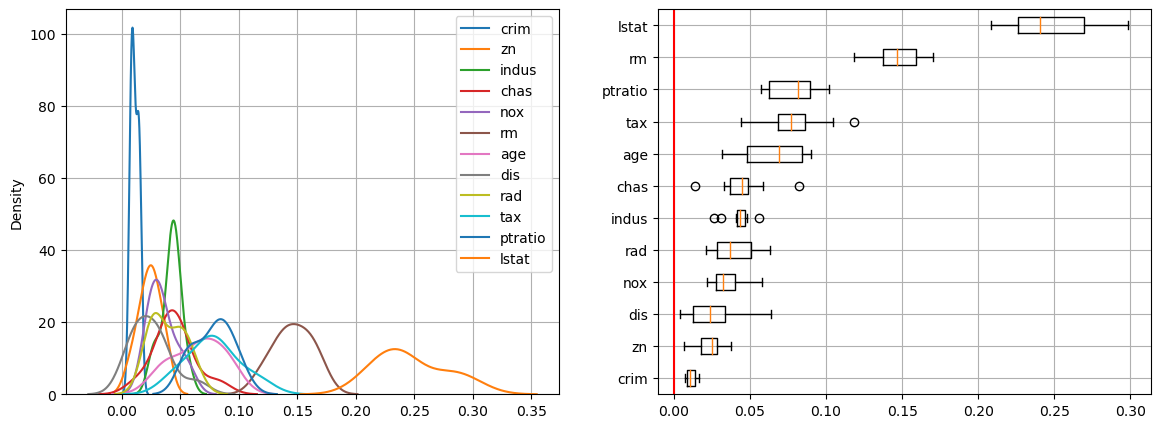

In [12]:
plot_PFI(pfi1, x.columns)

* 평균값으로 변수중요도 그래프 그리기

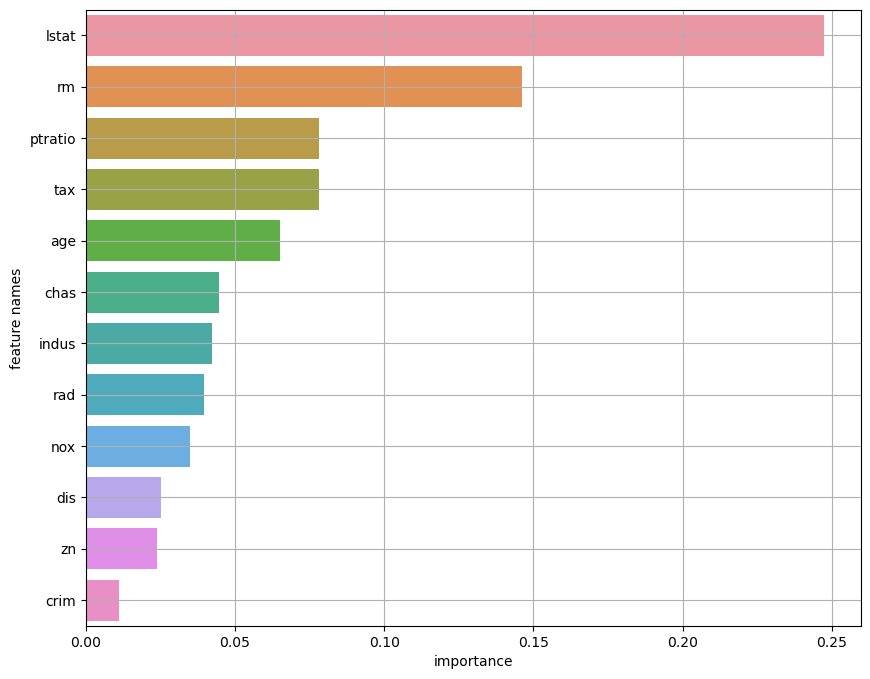

In [13]:
result = plot_feature_importance(pfi1.importances_mean, list(x_train))

### 2) DL 모델

* 간단한 DL 모델을 생성해 봅시다.

In [14]:
x_train_s.shape[1]

12

In [15]:
nfeatures = x_train_s.shape[1]
clear_session()

model2 = Sequential([Dense(32, input_shape = [nfeatures,], activation = 'relu'),
                     Dense(8, activation = 'relu'),
                     Dense(1)
                     ])

model2.compile(optimizer = 'adam', loss = 'mse')
history = model2.fit(x_train_s, y_train, epochs = 200, validation_split = .2).history

Epoch 1/200
11/11 [==============================] - 1s 16ms/step - loss: 615.3661 - val_loss: 577.5578
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 601.1603 - val_loss: 563.4788
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 586.8883 - val_loss: 549.0093
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 571.5635 - val_loss: 532.8231
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 552.9234 - val_loss: 510.6935
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 527.3924 - val_loss: 482.8355
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 496.3637 - val_loss: 449.6086
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 458.7287 - val_loss: 409.5291
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 415.4405 - val_loss: 366.1390
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss

* permutation feature importance 구하기
    * deep learning 모델에 대해서는 명시적으로 scoring = 'r2'을 지정해 줘야 합니다.

In [16]:
pfi2 = permutation_importance(model2, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

4/4 [==============================] - 0s 2ms/step


In [17]:
pfi2

{'importances_mean': array([0.04471928, 0.00847334, 0.01074231, 0.00177517, 0.01714572,
        0.21642707, 0.00279577, 0.01017785, 0.03486757, 0.06013936,
        0.03076569, 0.64119379]),
 'importances_std': array([0.01457038, 0.00483348, 0.00555625, 0.01103019, 0.00608332,
        0.03892352, 0.01331533, 0.01728236, 0.02616378, 0.0152671 ,
        0.00840205, 0.08818259]),
 'importances': array([[ 4.74839233e-02,  6.29549324e-02,  5.00153737e-02,
          5.54882854e-02,  2.67676550e-02,  4.45661554e-02,
          7.01992365e-02,  2.87336358e-02,  3.23441157e-02,
          2.86395275e-02],
        [ 3.10120210e-03,  7.13571750e-03,  8.57783838e-03,
          1.69914444e-02,  1.28760851e-02,  5.65033460e-03,
          1.06990075e-02,  5.70467143e-06,  6.48498543e-03,
          1.32110367e-02],
        [ 4.49835623e-03,  1.33664141e-02,  1.05257679e-02,
          2.03365336e-03,  7.32874854e-03,  1.72130781e-02,
          2.03255539e-02,  6.89575489e-03,  9.47421009e-03,
          1.

* feature별 Score 분포

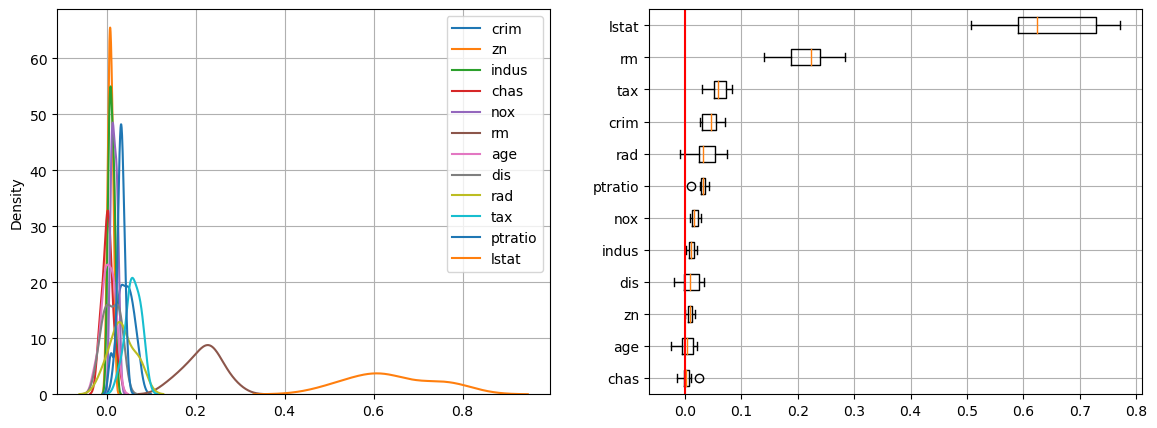

In [18]:
plot_PFI(pfi2, x.columns)

* 평균값으로 변수중요도 그래프 그리기

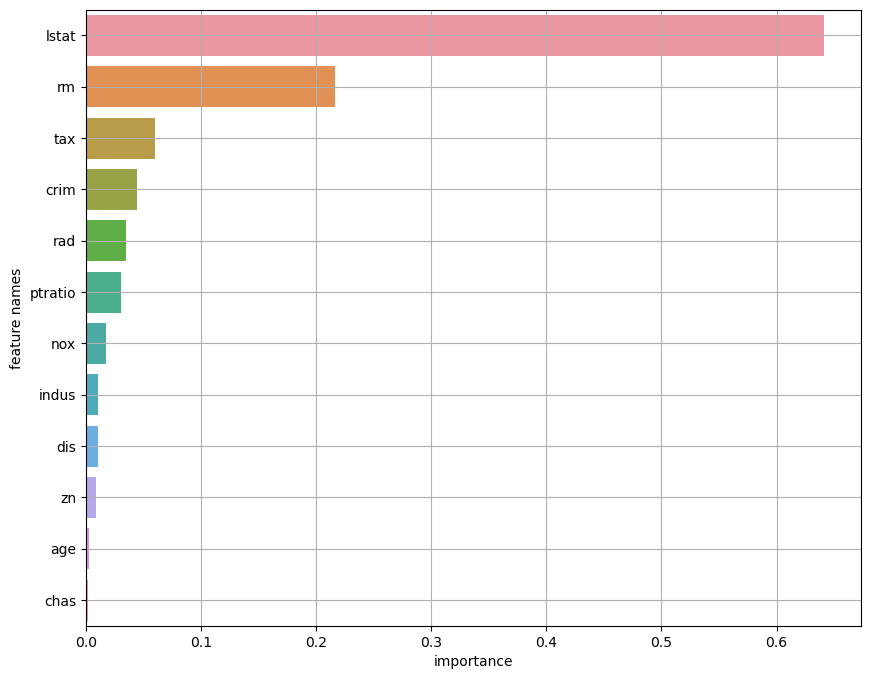

In [19]:
result = plot_feature_importance(pfi2.importances_mean, list(x_train))

In [20]:
from sklearn.metrics import *

In [21]:
pred1 = model1.predict(x_val_s)
print(mean_absolute_error(y_val, pred1))

3.154374560085553


In [22]:
pred2 = model2.predict(x_val_s)
print(mean_absolute_error(y_val, pred2))

4/4 [==============================] - 0s 2ms/step
3.5746394531399597


## 4.실습 : 직원 이직 예측모델 변수 중요도 비교

### 1) 데이터 준비

* 데이터 로딩

In [23]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head(10)

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1
5,0,44,Research & Development,2,1,Medical,Male,Manufacturing Director,3,Single,10209,5,2,16,2,2,2
6,0,41,Sales,10,2,Life Sciences,Male,Sales Executive,4,Single,6230,7,4,16,3,3,14
7,0,25,Sales,18,1,Life Sciences,Male,Sales Executive,3,Married,6232,2,2,6,3,2,3
8,0,50,Research & Development,2,3,Medical,Male,Research Director,3,Married,17639,5,4,30,3,3,4
9,0,47,Sales,4,2,Life Sciences,Female,Sales Executive,4,Single,4163,1,3,9,0,3,9


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


In [24]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [25]:
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

* 가변수화 Dummy Variable

In [26]:
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] # 가변수화 대상 변수 이름 리스트 만든다
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True)

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [27]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 2022)

In [28]:
print(x_train.shape, x_val.shape)

(920, 38) (230, 38)


* class balance를 맞추기 위한 resampling

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smote = SMOTE()
sm_x_train, sm_y_train = smote.fit_resample(x_train, y_train)

* 스케일링

In [31]:
scaler = MinMaxScaler()
sm_x_train_s = scaler.fit_transform(sm_x_train)
x_val_s = scaler.transform(x_val)

### 2) 모델링 및 변수 중요도 계산하기

* model1 : SVM
* model2 : KNN

In [32]:
from sklearn.inspection import permutation_importance

#### ① SVM 모델

* 모델링

* permutation feature importance 구하기

* feature별 Score 분포

* 평균값으로 변수중요도 그래프 그리기

* 예측 및 평가

#### ② KNN 모델

* 모델링

* permutation feature importance 구하기

* feature별 Score 분포

* 평균값으로 변수중요도 그래프 그리기